In [10]:
import os, json, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate
from param import *

sns.set(style = "darkgrid")

from sklearn.manifold import TSNE
path = './info/'
case = '17-571'

with open(path+'ral_spkr_dict.json') as j:
    spkr_dict = json.load(j)

In [4]:
predict = case+'_rdsv.rttm'
ral_label = case+'_ral.rttm'

predictions = load_rttm(path+predict)[case]
unref_gt = load_rttm(path+ral_label)[case]
groundtruths = load_rttm(path+case+'.rttm')[case]

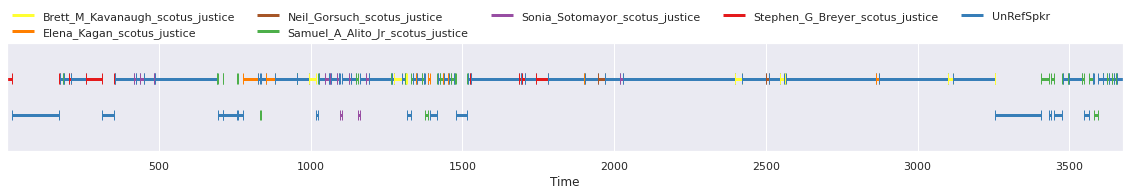

In [5]:
predictions

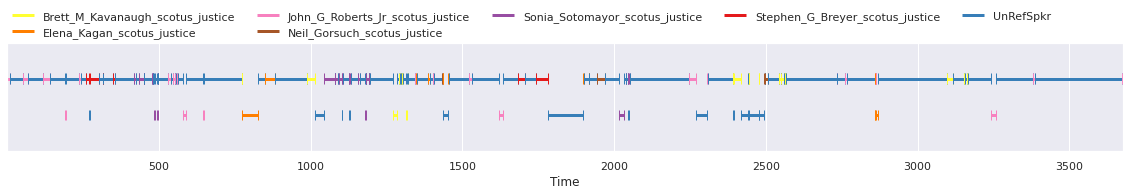

In [6]:
unref_gt

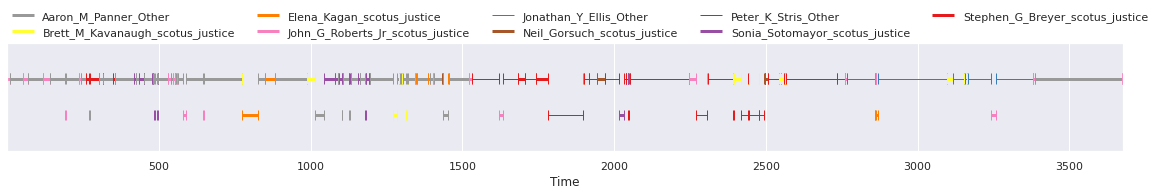

In [7]:
groundtruths

/home/jtumm13d/anaconda3/envs/audio/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


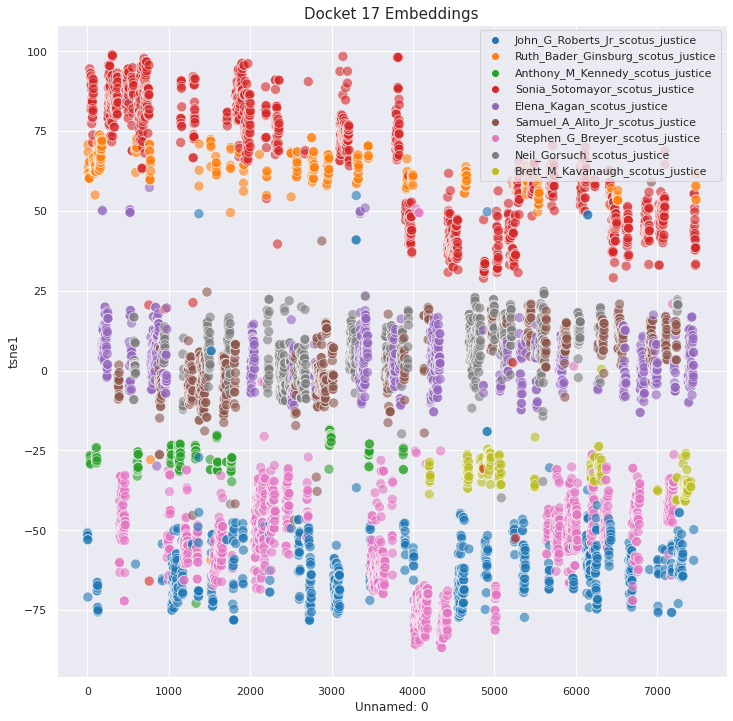

In [11]:
ts= pd.read_csv(path+'r1/tsne.csv')
Y = np.load(path+'r1/Y.npy')
clusters_tsne_scale = pd.concat([ts, pd.DataFrame({'tsne_clusters':Y})], axis=1)

y_scotus = []
for i in Y:
    y_scotus.append(list(spkr_dict.keys())[list(spkr_dict.values()).index(i)])
    
plt.figure(figsize = (12,12))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=y_scotus, palette='tab10', s=100, alpha=0.6).set_title('Docket 17 Embeddings', fontsize=15)
plt.show()